In [66]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import re
from matplotlib import pyplot as plt

In [2]:
orders = pd.read_csv("data/Orders.csv")
returns = pd.read_csv("data/Returns.csv")

In [5]:
print(orders.shape)
print(returns.shape)

(51290, 24)
(1079, 3)


In [23]:
orders[["Sales","Profit"]] = orders[["Sales","Profit"]].replace({'\$': '', ',': ''}, regex=True)

In [31]:
orders[["Sales","Profit"]] = orders[["Sales","Profit"]].astype("float")

In [105]:
orders["season"] = orders["season"].astype("str")

In [106]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
season             object
dtype: object

In [121]:
orders["season"] = orders["Ship.Date"]

In [124]:
orders["season"] = [re.search("^\d+", e).group() for e in orders["season"]]

In [ ]:
orders["season"] = orders["season"].astype("int64")

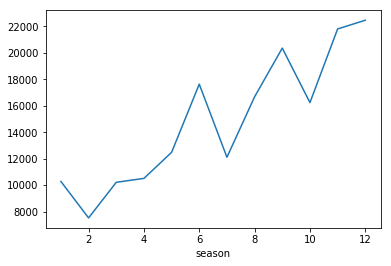

In [249]:
orders.groupby("season")["Quantity"].sum().plot.line()

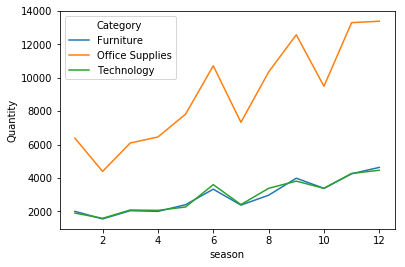

In [233]:
cat_sea = orders.groupby(["season", "Category"])[["Quantity"]].sum().reset_index()
sns.lineplot(x = "season", y = "Quantity", data = cat_sea, hue = "Category")

In [164]:
merged_orders = orders.merge(returns, how = "left", left_on = "Order.ID", right_on = "Order ID")

In [183]:
returns_df = merged_orders.loc[merged_orders["Returned"].isna() == False]

In [185]:
returns_df["Profit"].sum()

61370.75

In [239]:
sum(returns_df.groupby("Customer.ID")["Customer.ID"].count()>1)

547

In [240]:
sum(returns_df.groupby("Customer.ID")["Customer.ID"].count()>5)

46

In [247]:
(returns_df.groupby("Region_x")["Order.ID"].count()/merged_orders.groupby("Region_x")["Order.ID"].count()).sort_values(ascending = False)

Region_x
Western US           0.055261
Eastern Asia         0.055181
Southern Europe      0.053005
Southern Africa      0.052301
Southern US          0.051235
Eastern US           0.047051
Southeastern Asia    0.044743
South America        0.044511
Western Asia         0.044262
Oceania              0.044164
Central America      0.044160
Southern Asia        0.041808
Central Asia         0.041475
Western Africa       0.041096
Caribbean            0.040828
North Africa         0.039906
Western Europe       0.039606
Canada               0.039062
Northern Europe      0.034483
Central US           0.031855
Eastern Europe       0.027469
Central Africa       0.026439
Eastern Africa       0.024725
Name: Order.ID, dtype: float64

In [248]:
(returns_df.groupby("Category")["Order.ID"].count()/merged_orders.groupby("Category")["Order.ID"].count()).sort_values(ascending = False)

Category
Technology         0.043881
Furniture          0.043306
Office Supplies    0.043082
Name: Order.ID, dtype: float64